## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters ()
import seaborn as sns
import requests
import janitor as jn
from sklearn.preprocessing import LabelEncoder
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from mlforecast import MLForecast
from sklearn.svm import SVR
import xgboost as xgb
from numba import njit

/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torchmetrics/utilities/imports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _PYTHON_LOWER_3_8 = LooseVersion(_PYTHON_VERSION) < LooseVersion("3.8")
/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torchmetrics/utilities/imports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _PYTHON_LOWER_3_8 = LooseVersion(_PYTHON_VERSION) < LooseVersion("3.8")
/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torchvision/io/image.py:13: User

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:585: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:627: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/Users/nacerkroudir/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:637: DeprecationWarning: `np.b

## Download the Datasets

In [3]:
"""

url = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212400513/sales.csv'
response = requests.get(url)
with open('sales.csv', mode = 'wb') as file:
    file.write(response.content)
    
url = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212438184/sensor_stock_levels.csv'
response = requests.get(url)
with open('sensor_stock_levels.csv', mode = 'wb') as file:
    file.write(response.content)
    
url = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212467098/sensor_storage_temperature.csv'
response = requests.get(url)
with open('sensor_storage_temperature.csv', mode = 'wb') as file:
    file.write(response.content)
    
"""

"\n\nurl = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212400513/sales.csv'\nresponse = requests.get(url)\nwith open('sales.csv', mode = 'wb') as file:\n    file.write(response.content)\n    \nurl = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212438184/sensor_stock_levels.csv'\nresponse = requests.get(url)\nwith open('sensor_stock_levels.csv', mode = 'wb') as file:\n    file.write(response.content)\n    \nurl = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212467098/sensor_storage_temperature.csv'\nresponse = requests.get(url)\nwith open('sensor_storage_temperature.csv', mode = 'wb') as file:\n    file.write(response.content)\n    \n"

## Import Sales Dataset

In [4]:
df = pd.read_csv('sales.csv', index_col=0, parse_dates=['timestamp'])
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Import Sensor Stock Levels Dataset

In [5]:
df2 = pd.read_csv('sensor_stock_levels.csv', index_col=0, parse_dates=['timestamp'])
df2.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


## Import Sensor Storage Temperature Dataset

In [6]:
df3 = pd.read_csv('sensor_storage_temperature.csv', index_col=0, parse_dates=['timestamp'])
df3.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


## Preliminary Wrangling

### Sales Dataset

In [7]:
df.shape

(7829, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 611.6+ KB


In [9]:
df.describe()

,timestamp,unit_price,quantity,total
count,7829,7829.000000,7829.000000,7829.000000
mean,2022-03-04 13:41:47.803550976,7.819480,2.501597,19.709905
min,2022-03-01 09:00:13,0.190000,1.000000,0.190000
25%,2022-03-02 16:31:31,3.990000,1.000000,6.570000
50%,2022-03-04 14:03:33,7.190000,3.000000,14.970000
75%,2022-03-06 11:34:45,11.190000,4.000000,28.470000
max,2022-03-07 19:59:54,23.990000,4.000000,95.960000
std,NaN,5.388088,1.122722,17.446680


In [10]:
df['transaction_id'].duplicated().any()

False

In [11]:
df['timestamp'].max() - df['timestamp'].min()

Timedelta('6 days 10:59:41')

The total duration of data collection is almost **7 days**

In [12]:
df['product_id'].nunique()

300

### Sensor Stock Levels Dataset

In [13]:
df2.shape

(15000, 4)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 585.9+ KB


In [15]:
df2.describe()

,timestamp,estimated_stock_pct
count,15000,15000.000000
mean,2022-03-04 14:19:23.187800064,0.502735
min,2022-03-01 09:00:03,0.010000
25%,2022-03-02 17:25:51,0.260000
50%,2022-03-04 14:20:33.500000,0.500000
75%,2022-03-06 11:35:26,0.750000
max,2022-03-07 19:59:22,1.000000
std,NaN,0.286842


In [16]:
df2['id'].duplicated().any()

False

In [17]:
df2['timestamp'].max() - df2['timestamp'].min()

Timedelta('6 days 10:59:19')

The total duration of data collection is almost **7 days**

In [18]:
df2['product_id'].nunique()

300

### Sensor Storage Temperature Dataset

In [19]:
df3.shape

(23890, 3)

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.6+ KB


In [21]:
df3.describe()

,timestamp,temperature
count,23890,23890.000000
mean,2022-03-04 14:09:55.532817152,-0.207075
min,2022-03-01 09:00:08,-30.990000
25%,2022-03-02 17:06:27.500000,-2.860000
50%,2022-03-04 14:03:52.500000,-1.000000
75%,2022-03-06 11:31:09,1.840000
max,2022-03-07 19:59:50,34.990000
std,NaN,11.217649


In [22]:
df3['id'].duplicated().any()

False

In [23]:
df3['timestamp'].max() - df3['timestamp'].min()

Timedelta('6 days 10:59:42')

The total duration of data collection is almost **7 days**

## Merge Datasets
We will merge the 3 datasets together on `timestamp` column. Before doing that we need to make some preprocessing:
- sort the values by `timestamp`.
- Make `timestamp` hourly based.
- Aggregate some features.

#### sort the values by `timestamp`

In [24]:
df = df.sort_values('timestamp').reset_index().drop('index', axis=1)
df2 = df2.sort_values('timestamp').reset_index().drop('index', axis=1)
df3 = df3.sort_values('timestamp').reset_index().drop('index', axis=1)

#### Make `timestamp` hourly based

In [25]:
df['timestamp'] = df['timestamp'].dt.floor('H')
df2['timestamp'] = df2['timestamp'].dt.floor('H')
df3['timestamp'] = df3['timestamp'].dt.floor('H')

#### Aggregate some features
These new features are calculated for every product in an hourly basis:
- the sum of quantity

In [26]:
df_ = df.groupby(['timestamp', 'product_id']).agg({'quantity':'sum', 'customer_type': lambda x: x.mode().iat[0]}).reset_index()
df_

,timestamp,product_id,quantity,customer_type
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,premium
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,standard
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,non-member
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,premium
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,basic
...,...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3,premium
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3,standard
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2,premium
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1,premium


In [27]:
df_.shape

(6217, 4)

- the last recorded estimated stock percentage for each hour

In [28]:
df2_ = df2.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct':'last'}).reset_index()
df2_

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05
...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92


In [29]:
df2_.shape

(10845, 3)

- mean of temperatue
- median of temperature
- standard deviation of temperature

In [30]:
df3_ = df3.groupby(['timestamp'])['temperature'].mean().reset_index()
df3_

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


In [31]:
df3_.shape

(77, 2)

### Merge the datasets

In [32]:
data = df2_.merge(df_, on=['timestamp', 'product_id'], how='left')
data.head()

,timestamp,product_id,estimated_stock_pct,quantity,customer_type
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,premium
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,standard
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN


In [33]:
data = data.merge(df3_, on='timestamp', how='left')
data.head()

,timestamp,product_id,estimated_stock_pct,quantity,customer_type,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,premium,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,standard,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN,-0.02885


In [34]:
categories = df[['product_id', 'category']].drop_duplicates()
data = data.merge(categories, on='product_id', how='left')

In [35]:
prices = df[['product_id', 'unit_price']].drop_duplicates()
data = data.merge(prices, on='product_id', how='left')

In [36]:
data.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
customer_type          7778
temperature               0
category                  0
unit_price                0
dtype: int64

In [37]:
data['quantity'] = data['quantity'].fillna(0)

In [38]:
data['total'] = data['quantity'] * data['unit_price']

In [39]:
data['customer_type'] = data['customer_type'].fillna('None')

In [40]:
data.head()

,timestamp,product_id,estimated_stock_pct,quantity,customer_type,temperature,category,unit_price,total
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,premium,-0.02885,kitchen,11.19,33.57
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,standard,-0.02885,vegetables,1.49,4.47
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,None,-0.02885,baby products,14.19,0.00
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,None,-0.02885,beverages,20.19,0.00
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,None,-0.02885,pets,8.19,0.00


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   customer_type        10845 non-null  object        
 5   temperature          10845 non-null  float64       
 6   category             10845 non-null  object        
 7   unit_price           10845 non-null  float64       
 8   total                10845 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 762.7+ KB


## Feature Engineering

In [42]:
data['hour'] = data['timestamp'].dt.hour
data.head()

,timestamp,product_id,estimated_stock_pct,quantity,customer_type,temperature,category,unit_price,total,hour
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,premium,-0.02885,kitchen,11.19,33.57,9
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,standard,-0.02885,vegetables,1.49,4.47,9
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,None,-0.02885,baby products,14.19,0.00,9
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,None,-0.02885,beverages,20.19,0.00,9
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,None,-0.02885,pets,8.19,0.00,9


In [43]:
data.sort_values(['product_id','timestamp'], inplace=True)

In [44]:
data['estimated_stock_pct'] = data['estimated_stock_pct']*100

In [45]:
data_ = data.groupby(['product_id'])
data['estimated_stock_pct_shifted_1'] = data_['estimated_stock_pct'].shift(1).fillna(method='bfill')
data['estimated_stock_pct_shifted_2'] = data_['estimated_stock_pct'].shift(2).fillna(method='bfill')
data['estimated_stock_pct_shifted_24'] = data_['estimated_stock_pct'].shift(24).fillna(method='bfill')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 10692
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       10845 non-null  datetime64[ns]
 1   product_id                      10845 non-null  object        
 2   estimated_stock_pct             10845 non-null  float64       
 3   quantity                        10845 non-null  float64       
 4   customer_type                   10845 non-null  object        
 5   temperature                     10845 non-null  float64       
 6   category                        10845 non-null  object        
 7   unit_price                      10845 non-null  float64       
 8   total                           10845 non-null  float64       
 9   hour                            10845 non-null  int32         
 10  estimated_stock_pct_shifted_1   10845 non-null  float64       
 11  estimat

In [47]:
dates = dict(timestamp=pd.date_range(data.timestamp.min(), data.timestamp.max(), freq='1H'))
dates

{'timestamp': DatetimeIndex(['2022-03-01 09:00:00', '2022-03-01 10:00:00',
                '2022-03-01 11:00:00', '2022-03-01 12:00:00',
                '2022-03-01 13:00:00', '2022-03-01 14:00:00',
                '2022-03-01 15:00:00', '2022-03-01 16:00:00',
                '2022-03-01 17:00:00', '2022-03-01 18:00:00',
                ...
                '2022-03-07 10:00:00', '2022-03-07 11:00:00',
                '2022-03-07 12:00:00', '2022-03-07 13:00:00',
                '2022-03-07 14:00:00', '2022-03-07 15:00:00',
                '2022-03-07 16:00:00', '2022-03-07 17:00:00',
                '2022-03-07 18:00:00', '2022-03-07 19:00:00'],
               dtype='datetime64[ns]', length=155, freq='H')}

In [48]:
data = data.complete('product_id', dates)

In [49]:
data

,timestamp,product_id,estimated_stock_pct,quantity,customer_type,temperature,category,unit_price,total,hour,estimated_stock_pct_shifted_1,estimated_stock_pct_shifted_2,estimated_stock_pct_shifted_24
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,89.0,3.0,premium,-0.028850,kitchen,11.19,33.57,9.0,89.0,89.0,89.0
1,2022-03-01 10:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-01 11:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,41.0,0.0,None,-0.560000,kitchen,11.19,0.00,11.0,89.0,89.0,89.0
3,2022-03-01 12:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,85.0,0.0,None,-0.537721,kitchen,11.19,0.00,12.0,41.0,89.0,89.0
4,2022-03-01 13:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,39.0,0.0,None,-0.188734,kitchen,11.19,0.00,13.0,85.0,41.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46495,2022-03-07 15:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46496,2022-03-07 16:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46497,2022-03-07 17:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,31.0,0.0,None,-0.003988,snacks,3.19,0.00,17.0,46.0,16.0,73.0
46498,2022-03-07 18:00:00,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,98.0,0.0,None,0.409693,snacks,3.19,0.00,18.0,31.0,46.0,31.0


In [50]:
data.isnull().sum()

timestamp                             0
product_id                            0
estimated_stock_pct               35655
quantity                          35655
customer_type                     35655
temperature                       35655
category                          35655
unit_price                        35655
total                             35655
hour                              35655
estimated_stock_pct_shifted_1     35655
estimated_stock_pct_shifted_2     35655
estimated_stock_pct_shifted_24    35655
dtype: int64

In [51]:
data.drop('category', axis=1, inplace=True)
data.drop('unit_price', axis=1, inplace=True)

In [52]:
data = data.merge(categories, on='product_id', how='left')

In [53]:
data['customer_type'] = data['customer_type'].fillna('None')

In [54]:
data = data.merge(prices, on='product_id', how='left')

In [55]:
data.isnull().sum()

timestamp                             0
product_id                            0
estimated_stock_pct               35655
quantity                          35655
customer_type                         0
temperature                       35655
total                             35655
hour                              35655
estimated_stock_pct_shifted_1     35655
estimated_stock_pct_shifted_2     35655
estimated_stock_pct_shifted_24    35655
category                              0
unit_price                            0
dtype: int64

In [56]:
data = pd.get_dummies(data, columns=['category', 'customer_type'], drop_first=True)
data.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,total,hour,estimated_stock_pct_shifted_1,estimated_stock_pct_shifted_2,estimated_stock_pct_shifted_24,...,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,89.0,3.0,-0.028850,33.57,9.0,89.0,89.0,89.0,...,False,False,False,False,False,False,False,False,True,False
1,2022-03-01 10:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2022-03-01 11:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,41.0,0.0,-0.560000,0.00,11.0,89.0,89.0,89.0,...,False,False,False,False,False,False,False,False,False,False
3,2022-03-01 12:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,85.0,0.0,-0.537721,0.00,12.0,41.0,89.0,89.0,...,False,False,False,False,False,False,False,False,False,False
4,2022-03-01 13:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,39.0,0.0,-0.188734,0.00,13.0,85.0,41.0,89.0,...,False,False,False,False,False,False,False,False,False,False


In [57]:
le = LabelEncoder()
data['product_id'] = le.fit_transform(data['product_id'])
prices['product_id'] = le.transform(prices['product_id'])

In [58]:
data['quantity'] = data['quantity'].fillna(0)

In [59]:
data['total'] = data['quantity']*data['unit_price']

In [60]:
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

In [61]:
data.sort_values(['product_id','timestamp'], inplace=True)

In [62]:
data_ = data.groupby(['product_id'])
data['estimated_stock_pct'] = data_['estimated_stock_pct'].fillna(method='ffill').fillna(method='bfill')

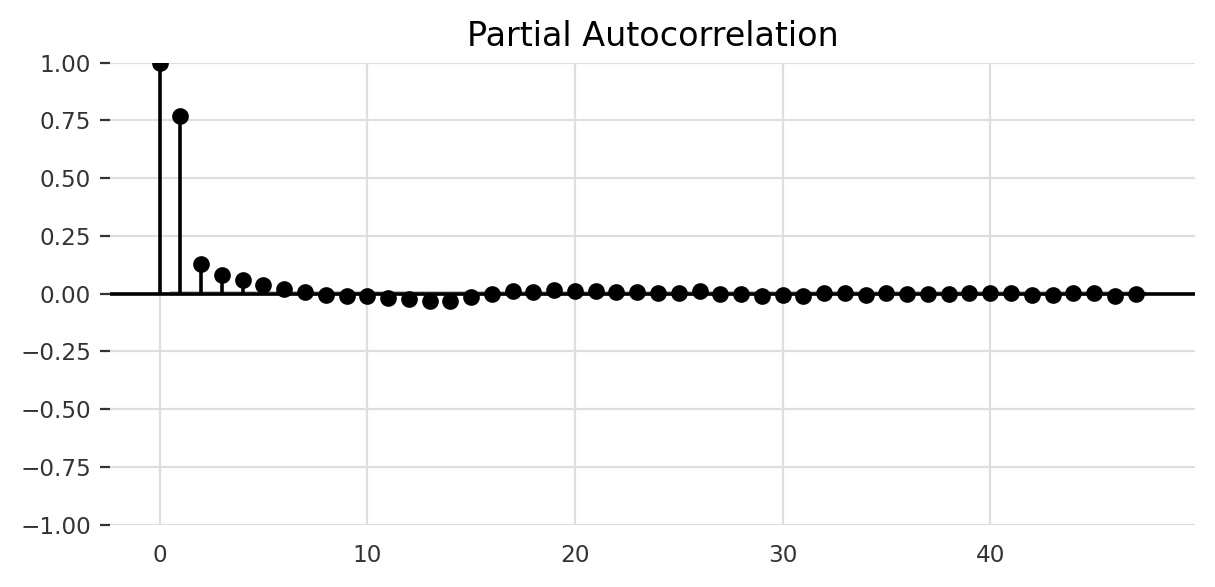

In [63]:
fig, ax = plt.subplots(1,1, figsize=(7,3), dpi=200)
pacf_plot = plot_pacf(data.estimated_stock_pct, ax=ax)

# !!!!!!!

In [64]:
# 1, 2, 3
data['temperature'] = data_['temperature'].fillna(method='ffill').fillna(method='bfill')
data['estimated_stock_pct_shifted_1'] = data_['estimated_stock_pct'].shift(1).fillna(method='bfill')
data['estimated_stock_pct_shifted_2'] = data_['estimated_stock_pct'].shift(2).fillna(method='bfill')
data['estimated_stock_pct_shifted_3'] = data_['estimated_stock_pct'].shift(3).fillna(method='bfill')

In [65]:
data['quantity_shifted_1'] = data_['quantity'].shift(1).fillna(0)
data['temperature_shifted_1'] = data_['temperature'].shift(1).fillna(method='bfill')
data['total_shifted_1'] = data_['total'].shift(1).fillna(0)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46500 entries, 0 to 46499
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       46500 non-null  datetime64[ns]
 1   product_id                      46500 non-null  int64         
 2   estimated_stock_pct             46500 non-null  float64       
 3   quantity                        46500 non-null  float64       
 4   temperature                     46500 non-null  float64       
 5   total                           46500 non-null  float64       
 6   hour                            46500 non-null  int32         
 7   estimated_stock_pct_shifted_1   46500 non-null  float64       
 8   estimated_stock_pct_shifted_2   46500 non-null  float64       
 9   estimated_stock_pct_shifted_24  10845 non-null  float64       
 10  unit_price                      46500 non-null  float64       
 11  ca

In [67]:
data = data.rename(columns={'timestamp': 'ds', 'estimated_stock_pct': 'y', 'product_id': 'unique_id'})

In [68]:
data.drop(['quantity', 'temperature', 'total'], axis=1, inplace=True)

In [69]:
data

,ds,unique_id,y,hour,estimated_stock_pct_shifted_1,estimated_stock_pct_shifted_2,estimated_stock_pct_shifted_24,unit_price,category_baked goods,category_baking,...,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,day,month,estimated_stock_pct_shifted_3,quantity_shifted_1,temperature_shifted_1,total_shifted_1
0,2022-03-01 09:00:00,0,89.0,9,89.0,89.0,89.0,11.19,False,False,...,False,False,True,False,1,3,89.0,0.0,-0.028850,0.00
1,2022-03-01 10:00:00,0,89.0,10,89.0,89.0,NaN,11.19,False,False,...,False,False,False,False,1,3,89.0,3.0,-0.028850,33.57
2,2022-03-01 11:00:00,0,41.0,11,89.0,89.0,89.0,11.19,False,False,...,False,False,False,False,1,3,89.0,0.0,-0.028850,0.00
3,2022-03-01 12:00:00,0,85.0,12,41.0,89.0,89.0,11.19,False,False,...,False,False,False,False,1,3,89.0,0.0,-0.560000,0.00
4,2022-03-01 13:00:00,0,39.0,13,85.0,41.0,89.0,11.19,False,False,...,False,False,False,False,1,3,89.0,0.0,-0.537721,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46495,2022-03-07 15:00:00,299,46.0,15,46.0,46.0,NaN,3.19,False,False,...,False,False,False,False,7,3,46.0,0.0,-1.847270,0.00
46496,2022-03-07 16:00:00,299,46.0,16,46.0,46.0,NaN,3.19,False,False,...,False,False,False,False,7,3,46.0,0.0,-1.847270,0.00
46497,2022-03-07 17:00:00,299,31.0,17,46.0,46.0,73.0,3.19,False,False,...,False,False,False,False,7,3,46.0,0.0,-1.847270,0.00
46498,2022-03-07 18:00:00,299,98.0,18,31.0,46.0,31.0,3.19,False,False,...,False,False,False,False,7,3,46.0,0.0,-0.003988,0.00


<Axes: xlabel='ds'>

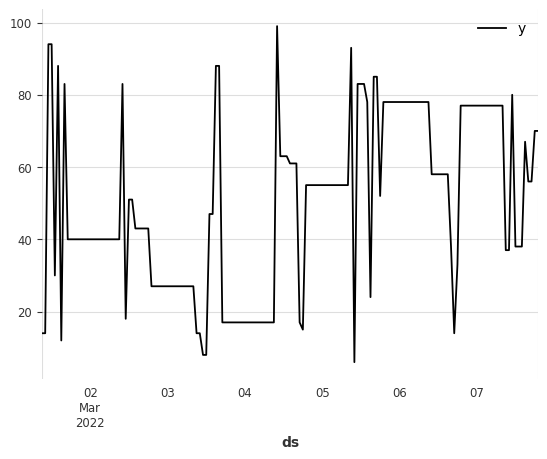

In [70]:
data[data['unique_id']==1][['ds','y']].plot(x='ds', y='y')

<Axes: xlabel='ds'>

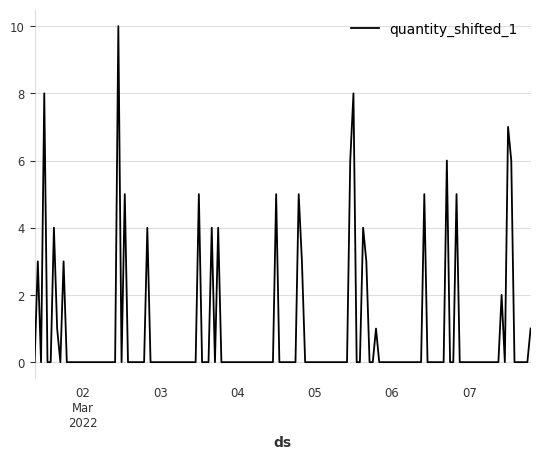

In [71]:
data[data['unique_id']==1][['ds','quantity_shifted_1']].plot(x='ds', y='quantity_shifted_1')

In [72]:
data.isnull().sum()

ds                                    0
unique_id                             0
y                                     0
hour                                  0
estimated_stock_pct_shifted_1         0
estimated_stock_pct_shifted_2         0
estimated_stock_pct_shifted_24    35655
unit_price                            0
category_baked goods                  0
category_baking                       0
category_beverages                    0
category_canned foods                 0
category_cheese                       0
category_cleaning products            0
category_condiments and sauces        0
category_dairy                        0
category_frozen                       0
category_fruit                        0
category_kitchen                      0
category_meat                         0
category_medicine                     0
category_packaged foods               0
category_personal care                0
category_pets                         0
category_refrigerated items           0


In [73]:
data['diff'] = data['estimated_stock_pct_shifted_1'] - data['estimated_stock_pct_shifted_2']

In [74]:
def map_values(value):
    if value > 0:
        return 1 # restocked
    else:
        return 0 # did not restock
data['state'] = data['diff'].apply(map_values)

In [75]:
train = data[data['ds']<'2022-03-07']
test = data[data['ds']>='2022-03-07']
train.drop('ds', axis=1, inplace=True)
test.drop('ds', axis=1, inplace=True)
train.shape, test.shape

/var/folders/5j/08x3ytg55k1ggg9spv8j4fm80000gn/T/ipykernel_7943/4100855707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('ds', axis=1, inplace=True)
/var/folders/5j/08x3ytg55k1ggg9spv8j4fm80000gn/T/ipykernel_7943/4100855707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('ds', axis=1, inplace=True)


((40500, 41), (6000, 41))

## Build the Model
### XGBRegressor

In [76]:
y_train, y_test = train['y'], test['y']
X_train, X_test = train.drop('y', axis=1), test.drop('y', axis=1) 

In [77]:
parameters = {'n_estimators':[128,200], 'max_depth':[7,9], 'learning_rate':[0.03,0.04]}
model = xgb.XGBRegressor(n_jobs=-1, random_state=44)
gs = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=44, ...),
             param_grid={'learning_rate': [0.03, 0.04], 'max_depth': [7, 9],
                         'n_estimators': [128, 200]},
             scoring='neg_mean_squared_error')

In [78]:
gs.best_params_

{'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 128}

In [79]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_pred'] = gs.predict(X_test)
y_test_df['y_pred_shifted_1'] = y_test_df['y_pred'].shift(1)
y_test_df['y_pred_shifted_2'] = y_test_df['y_pred'].shift(2).fillna(method='bfill')
y_test_df['diff'] = X_test['diff']
y_test_df['diff_pred'] = y_test_df['y_pred_shifted_1'] - y_test_df['y_pred_shifted_2']
y_test_df['state'] = X_test['state']
y_test_df['state_pred'] = y_test_df['diff_pred'].apply(map_values)
y_test_df.head()

,y,y_pred,y_pred_shifted_1,y_pred_shifted_2,diff,diff_pred,state,state_pred
135,73.0,71.662445,NaN,71.662445,0.0,NaN,0,0
136,73.0,71.662445,71.662445,71.662445,0.0,0.0,0,0
137,73.0,71.662445,71.662445,71.662445,0.0,0.0,0,0
138,73.0,71.662445,71.662445,71.662445,0.0,0.0,0,0
139,73.0,71.662445,71.662445,71.662445,0.0,0.0,0,0


In [80]:
y_test_df['accuracy'] = (y_test_df['state'] == y_test_df['state_pred'])
y_test_df['accuracy'].value_counts(normalize=True)

accuracy
True     0.784
False    0.216
Name: proportion, dtype: float64

In [81]:
def evaluate(model_, X_test_, y_test_):
    y_pred = model_.predict(X_test_)

    results = pd.DataFrame({"MSE"  : [mean_squared_error(y_test_, y_pred)],
                            "RMSE" : [np.sqrt(mean_squared_error(y_test_, y_pred))],
                            "MAE"  : [mean_absolute_error(y_test_, y_pred)],
                            "R2"   : [r2_score(y_test_, y_pred)]})
    return results

In [82]:
evaluate(gs, X_test, y_test)

,MSE,RMSE,MAE,R2
0,226.496116,15.049788,7.431851,0.72723


### LGBMRegressor

In [83]:
parameters = {'n_estimators':[600,800], 'max_depth':[8,10], 'learning_rate':[0.04]}
model = LGBMRegressor(random_state=44)
gs = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=44),
             param_grid={'learning_rate': [0.04], 'max_depth': [8, 10],
                         'n_estimators': [600, 800]},
             scoring='neg_mean_squared_error')

In [84]:
gs.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 600}

In [85]:
evaluate(gs, X_test, y_test)

,MSE,RMSE,MAE,R2
0,232.349011,15.242999,6.929682,0.720181


In [86]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_pred'] = gs.predict(X_test)
y_test_df['y_pred_shifted_1'] = y_test_df['y_pred'].shift(1)
y_test_df['y_pred_shifted_2'] = y_test_df['y_pred'].shift(2).fillna(method='bfill')
y_test_df['diff'] = X_test['diff']
y_test_df['diff_pred'] = y_test_df['y_pred_shifted_1'] - y_test_df['y_pred_shifted_2']
y_test_df['state'] = X_test['state']
y_test_df['state_pred'] = y_test_df['diff_pred'].apply(map_values)
y_test_df.head()

,y,y_pred,y_pred_shifted_1,y_pred_shifted_2,diff,diff_pred,state,state_pred
135,73.0,72.838058,NaN,72.838058,0.0,NaN,0,0
136,73.0,72.838058,72.838058,72.838058,0.0,0.0,0,0
137,73.0,72.838058,72.838058,72.838058,0.0,0.0,0,0
138,73.0,72.838058,72.838058,72.838058,0.0,0.0,0,0
139,73.0,72.838058,72.838058,72.838058,0.0,0.0,0,0


In [87]:
y_test_df['accuracy'] = (y_test_df['state'] == y_test_df['state_pred'])
y_test_df['accuracy'].value_counts(normalize=True)

accuracy
True     0.768
False    0.232
Name: proportion, dtype: float64

In [88]:
y_test_df[['state', 'state_pred']].value_counts()

state  state_pred
0      0             4142
       1             1142
1      1              466
       0              250
Name: count, dtype: int64

In [89]:
y_test_df['filter'] = (y_test_df['y'] - X_test['estimated_stock_pct_shifted_1']).apply(map_values)

In [90]:
yy = y_test_df[y_test_df['filter']<1]
np.sqrt(np.mean((yy['y'] - yy['y_pred'])**2))

11.25836126366371

### Grouping

In [91]:
X_train_g = X_train.groupby('unique_id')
X_test_g = X_test.groupby('unique_id')

In [92]:
parameters = {'n_estimators':[256,512], 'max_depth':[6,8], 'learning_rate':[0.01]}
model = LGBMRegressor(random_state=44)
gs = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
models = {}
for name, group in X_train_g:
    print(f"fitting model {name}...")
    gs.fit(group, y_train.loc[group.index])
    models[name] = gs
    print(f"model {name} complete!")

fitting model 0...
model 0 complete!
fitting model 1...
model 1 complete!
fitting model 2...
model 2 complete!
fitting model 3...
model 3 complete!
fitting model 4...
model 4 complete!
fitting model 5...
model 5 complete!
fitting model 6...
model 6 complete!
fitting model 7...
model 7 complete!
fitting model 8...
model 8 complete!
fitting model 9...
model 9 complete!
fitting model 10...
model 10 complete!
fitting model 11...
model 11 complete!
fitting model 12...
model 12 complete!
fitting model 13...
model 13 complete!
fitting model 14...
model 14 complete!
fitting model 15...
model 15 complete!
fitting model 16...
model 16 complete!
fitting model 17...
model 17 complete!
fitting model 18...
model 18 complete!
fitting model 19...
model 19 complete!
fitting model 20...
model 20 complete!
fitting model 21...
model 21 complete!
fitting model 22...
model 22 complete!
fitting model 23...
model 23 complete!
fitting model 24...
model 24 complete!
fitting model 25...
model 25 complete!
fittin

model 205 complete!
fitting model 206...
model 206 complete!
fitting model 207...
model 207 complete!
fitting model 208...
model 208 complete!
fitting model 209...
model 209 complete!
fitting model 210...
model 210 complete!
fitting model 211...
model 211 complete!
fitting model 212...
model 212 complete!
fitting model 213...
model 213 complete!
fitting model 214...
model 214 complete!
fitting model 215...
model 215 complete!
fitting model 216...
model 216 complete!
fitting model 217...
model 217 complete!
fitting model 218...
model 218 complete!
fitting model 219...
model 219 complete!
fitting model 220...
model 220 complete!
fitting model 221...
model 221 complete!
fitting model 222...
model 222 complete!
fitting model 223...
model 223 complete!
fitting model 224...
model 224 complete!
fitting model 225...
model 225 complete!
fitting model 226...
model 226 complete!
fitting model 227...
model 227 complete!
fitting model 228...
model 228 complete!
fitting model 229...
model 229 comple

In [93]:
y_test_df = pd.DataFrame(y_test)
y_test_df['y_pred'] = np.nan
for name, group in X_test_g:
    y_pred = models[name].predict(group)
    y_test_df.loc[group.index, 'y_pred'] = y_pred

In [94]:
y_test_ = y_test_df['y']
y_pred = y_test_df['y_pred']
results = pd.DataFrame({"MSE"  : [mean_squared_error(y_test_, y_pred)],
                            "RMSE" : [np.sqrt(mean_squared_error(y_test_, y_pred))],
                            "MAE"  : [mean_absolute_error(y_test_, y_pred)],
                            "R2"   : [r2_score(y_test_, y_pred)]})
results

,MSE,RMSE,MAE,R2
0,437.544838,20.917572,15.737025,0.473063


### MLForecast

In [ ]:
models = [xgb.XGBRegressor(random_state=0, n_estimators=4096, learning_rate=0.01),
          LGBMRegressor(random_state=0, n_estimators=4096, learning_rate=0.01)]

In [ ]:
model = MLForecast(models=models,
                   freq='H',
                   lags=[1,2,24],
                   num_threads=6)

In [ ]:
model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

In [ ]:
test.columns

In [ ]:
p = model.predict(horizon=20, dynamic_dfs=[test[['unique_id', 'ds', 'hour', 'estimated_stock_pct_shifted_1',
       'estimated_stock_pct_shifted_2', 'estimated_stock_pct_shifted_24',
       'unit_price', 'category_baked goods', 'category_baking',
       'category_beverages', 'category_canned foods', 'category_cheese',
       'category_cleaning products', 'category_condiments and sauces',
       'category_dairy', 'category_frozen', 'category_fruit',
       'category_kitchen', 'category_meat', 'category_medicine',
       'category_packaged foods', 'category_personal care', 'category_pets',
       'category_refrigerated items', 'category_seafood', 'category_snacks',
       'category_spices and herbs', 'category_vegetables',
       'customer_type_basic', 'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'quantity_shifted_1',
       'temperature_shifted_1', 'total_shifted_1']]])
p = p.merge(test[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

In [ ]:
p['LGBMRegressor_MSE'] = (p['LGBMRegressor']-p['y'])**2
p['XGBRegressor_MSE'] = (p['XGBRegressor']-p['y'])**2
p['hour'] = p['ds'].dt.hour
p = p[p['hour'].isin([9,10,11,12,13,14,15,16,17,18,19])]
p.drop('hour', axis=1, inplace=True)
p

In [ ]:
p.LGBMRegressor_MSE.mean(), np.sqrt(p.LGBMRegressor_MSE.mean())

In [ ]:
p.XGBRegressor_MSE.mean(), np.sqrt(p.XGBRegressor_MSE.mean())

### LSTM

In [110]:
X_train.fillna(method='bfill', inplace=True)
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='bfill', inplace=True)
X_test.fillna(method='ffill', inplace=True)

In [111]:
train_X = np.expand_dims(X_train.values, -1)
train_y = np.expand_dims(y_train.values, -1)

In [112]:
test_X = np.expand_dims(X_test.values, -1)
test_y = np.expand_dims(y_test.values, -1)

In [113]:
train_X = np.array(train_X, dtype=np.float32)
train_y = np.array(train_y, dtype=np.float32)
test_X = np.array(test_X, dtype=np.float32)
test_y = np.array(test_y, dtype=np.float32)

In [114]:
train_X.shape, train_y.shape

((40500, 40, 1), (40500, 1))

In [115]:
test_X.shape, test_y.shape

((6000, 40, 1), (6000, 1))

In [120]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=128, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
317/317 - 8s - loss: 2141.5073 - val_loss: 1549.3032
Epoch 2/50
317/317 - 6s - loss: 1263.3881 - val_loss: 1066.9064
Epoch 3/50
317/317 - 6s - loss: 960.2774 - val_loss: 890.7865
Epoch 4/50
317/317 - 7s - loss: 857.5936 - val_loss: 837.4617
Epoch 5/50
317/317 - 6s - loss: 746.1935 - val_loss: 602.1960
Epoch 6/50
317/317 - 7s - loss: 509.3724 - val_loss: 487.7273
Epoch 7/50
317/317 - 8s - loss: 421.2602 - val_loss: 438.1232
Epoch 8/50
317/317 - 7s - loss: 378.5636 - val_loss: 411.8875
Epoch 9/50
317/317 - 7s - loss: 353.7753 - val_loss: 393.5576
Epoch 10/50
317/317 - 6s - loss: 340.7995 - val_loss: 390.0736
Epoch 11/50
317/317 - 7s - loss: 332.0916 - val_loss: 380.2057
Epoch 12/50
317/317 - 7s - loss: 324.5544 - val_loss: 380.4722
Epoch 13/50
317/317 - 7s - loss: 319.9360 - val_loss: 372.4172
Epoch 14/50
317/317 - 7s - loss: 315.1542 - val_loss: 371.1448
Epoch 15/50
317/317 - 7s - loss: 311.0375 - val_loss: 367.5117
Epoch 16/50
317/317 - 6s - loss: 309.5650 - val_loss: 366.36

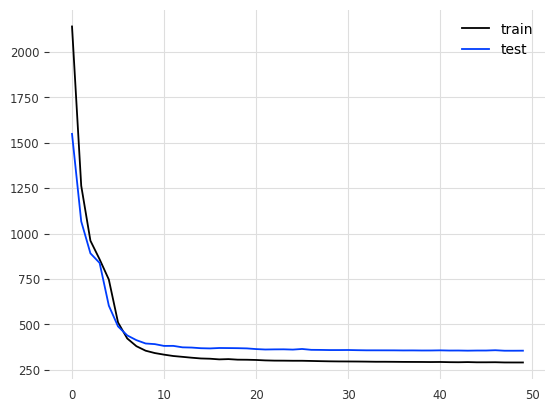

In [121]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [122]:
# without 24, with fill
evaluate(model, test_X, test_y)

,MSE,RMSE,MAE,R2
0,353.918884,18.812733,11.483212,0.573774
